In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [4]:
df_spread = pd.read_excel('Dados.xlsx', sheet_name='Tb_Spread')
df_spread

,Data,Taxa média crédito rural,Taxa Selic,Spread selic,Swap,Spread swap
0,2011-03-01,0.132192,0.111701,0.018432,0.124600,0.006751
1,2011-04-01,0.149797,0.116699,0.029639,0.124400,0.022587
2,2011-05-01,0.140286,0.119200,0.018841,0.124600,0.013948
3,2011-06-01,0.155264,0.119200,0.032223,0.125200,0.026718
4,2011-07-01,0.138933,0.121700,0.015364,0.126200,0.011307
...,...,...,...,...,...,...
158,2024-05-01,0.138933,0.106501,0.029311,0.104010,0.031634
159,2024-06-01,0.138933,0.104001,0.031642,0.108890,0.027093
160,2024-07-01,0.140286,0.104001,0.032867,0.111378,0.026011
161,2024-08-01,0.134884,0.104001,0.027974,0.114082,0.018672


In [122]:
def plotar_correlacao(df_cruzado, serie='Inadimplencia', data='Data', nome_serie='Inadimplência mercado', serie_spread='Spread selic', multiplicador_spread=100.0, media_movel=True, periodo_media=3, inverte=False):

    sns.set_style("white")
    df_grafico = df_cruzado

    df_grafico['Spread comparacao'] = df_grafico['Spread swap'] * multiplicador_spread

    df_grafico = df_grafico.loc[:, ['Data', serie, 'Spread comparacao'] ]


    if(media_movel):
        df_grafico[serie+'_mm'] = df_grafico[serie].rolling(periodo_media).mean()
        df_grafico['Spread comparacao'+'_mm'] = df_grafico['Spread comparacao'].rolling(periodo_media).mean()
        df_grafico = df_grafico.dropna()
        data2 = df_grafico[serie+'_mm']
        data1 = df_grafico['Spread comparacao'+'_mm']
    else:
        df_grafico = df_grafico.dropna()
        data2 = df_grafico[serie+'']
        data1 = df_grafico['Spread comparacao'+'']

    df_grafico = df_grafico.dropna()
    t = df_grafico[data]

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Spread over Selic (%)', color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:gray'
    ax2.set_ylabel(nome_serie, color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    if inverte:
        ax2.set_ylim(ax2.get_ylim()[::-1])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    correl = scipy.stats.pearsonr(data1, data2)    # Pearson's r

    plt.title('Spread crédito rural x ' + nome_serie.replace('(', '').replace(')', '').replace('%', '') + ' (' + r'$\rho$' + ' = ' + '{0:.2f}'.format(correl[0]) + ' p-valor = ' +  '{0:.2%}'.format(correl[1]) +  ')')

    plt.show()



In [139]:
series = { 
    'Tb_Inadimplencia' : { 'Data' : 'Data', 'Serie' : 'Inadimplencia', 'Nome Serie' : 'Inadimplência mercado (%)',  'media_movel' : True , 'inverte' : False},
    'Tb_Pib' : { 'Data' : 'Data', 'Serie' : 'PIB', 'Nome Serie' : 'PIB Agronegócio - ESALQ',  'media_movel' : False , 'inverte' : True},
    'Tb_TPF' : { 'Data' : 'Data', 'Serie' : 'TPF', 'Nome Serie' : 'Produtividade Total dos Fatores',  'media_movel' : False , 'inverte' : True},
    'Tb_Sinistralidade' : { 'Data' : 'Data', 'Serie' : 'Sinistralidade', 'Nome Serie' : 'Sinistralidade Seguro Rural (%)',  'media_movel' : False , 'inverte' : False},
    'Tb_ProducaoGraos' : { 'Data' : 'Data', 'Serie' : 'Producao', 'Nome Serie' : 'Produção nacional de grãos em ton mil',  'media_movel' : False , 'inverte' : True},
    'Tb_ProdutividadeGraos' : { 'Data' : 'Data', 'Serie' : 'Produtividade', 'Nome Serie' : 'Produtividade kg/ha',  'media_movel' : False , 'inverte' : True},
    'Tb_Confianca' : { 'Data' : 'Data', 'Serie' : 'Confiança', 'Nome Serie' : 'Índice de Confiança Agronegócio FIESP',  'media_movel' : False , 'inverte' : True},
    'Tb_IAgro' : { 'Data' : 'Data', 'Serie' : 'Valor', 'Nome Serie' : 'Índice Agro B3',  'media_movel' : True , 'inverte' : True},
    'Tb_Commodities' : { 'Data' : 'Data', 'Serie' : 'Commodities', 'Nome Serie' : 'Índice Commodities Agro S&P',  'media_movel' : True , 'inverte' : True},
    'Tb_RelacaoSoja' : { 'Data' : 'Data', 'Serie' : 'Relacao', 'Nome Serie' : 'Relação troca Soja',  'media_movel' : True , 'inverte' : True},
    'Tb_Exportacao' : { 'Data' : 'Data', 'Serie' : 'Exportação', 'Nome Serie' : 'Exportações US\$ Bi',  'media_movel' : False , 'inverte' : True},
    'Tb_Indenizacoes' : { 'Data' : 'Data', 'Serie' : 'Indenização', 'Nome Serie' : 'Indenizações R\$ bi',  'media_movel' : False , 'inverte' : False},

    
    
}




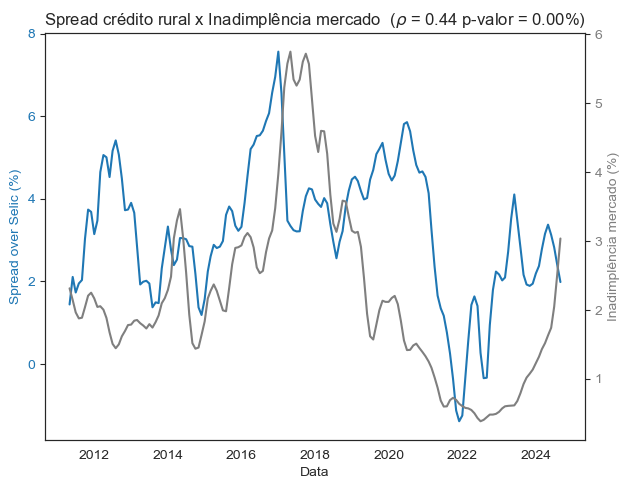

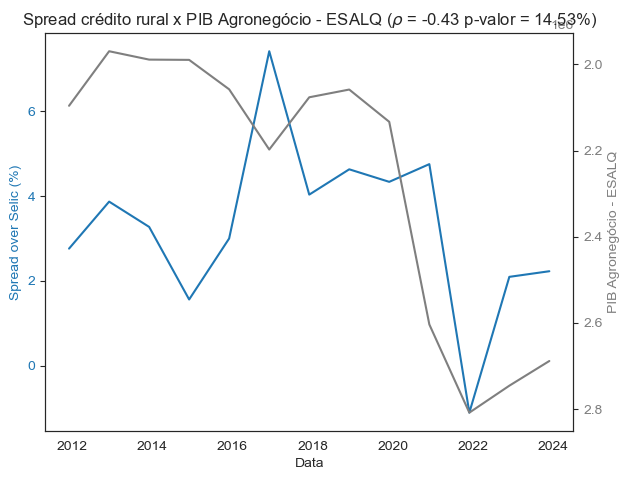

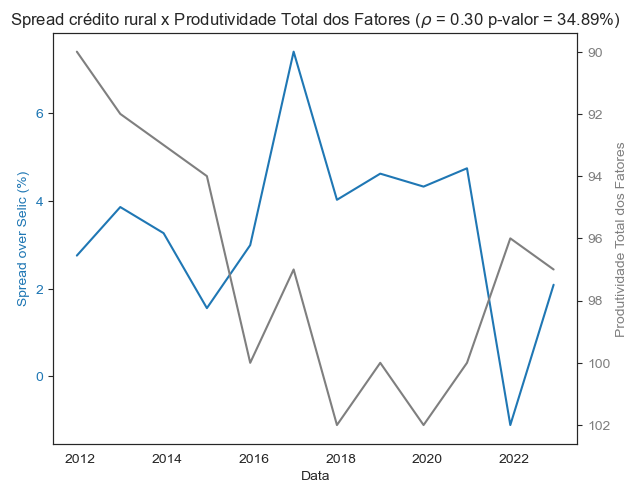

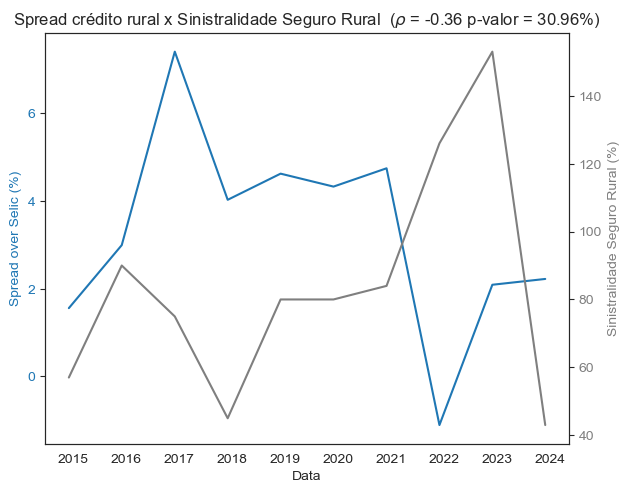

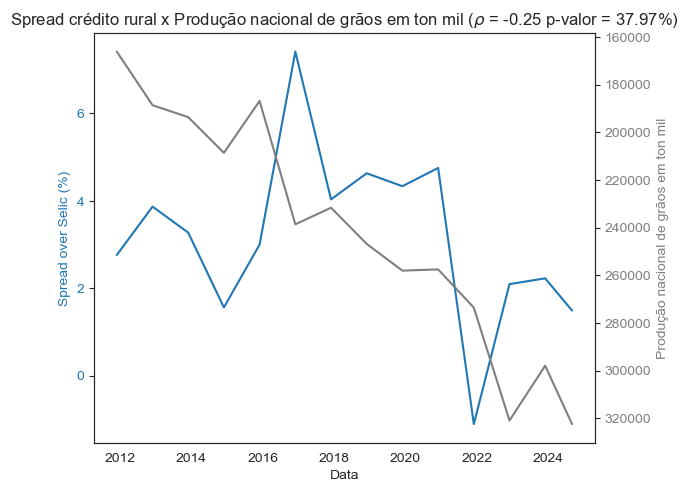

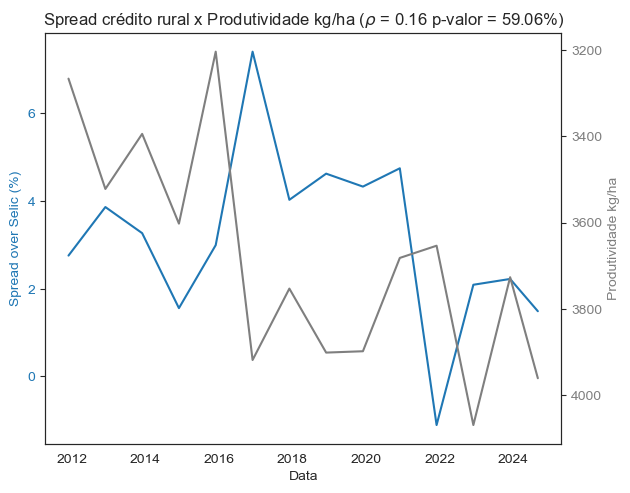

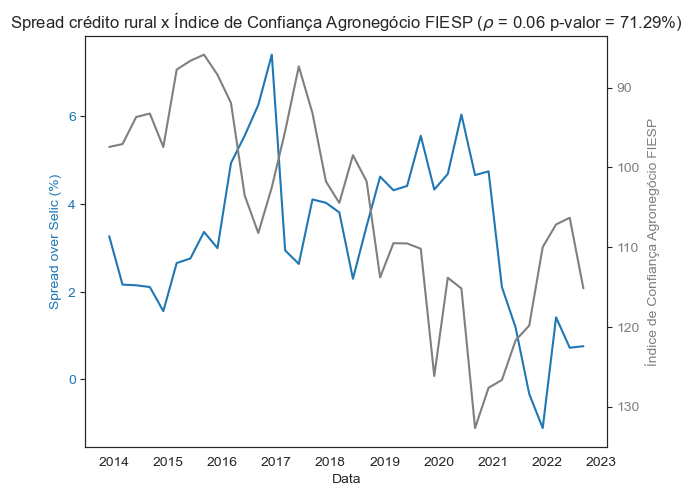

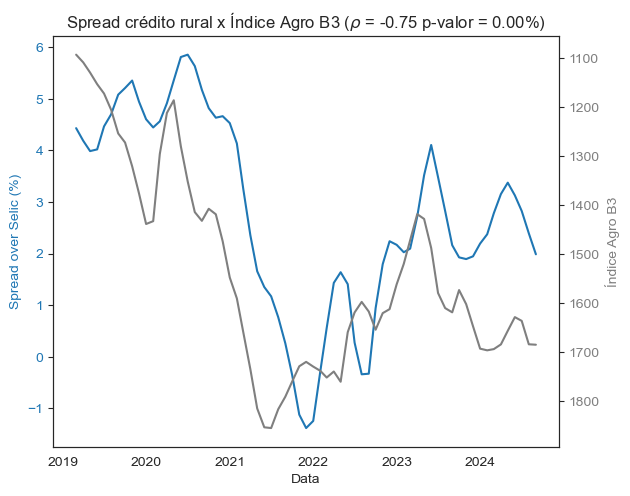

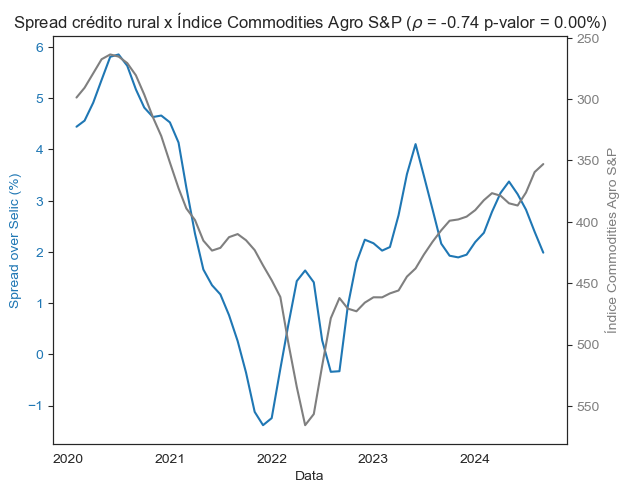

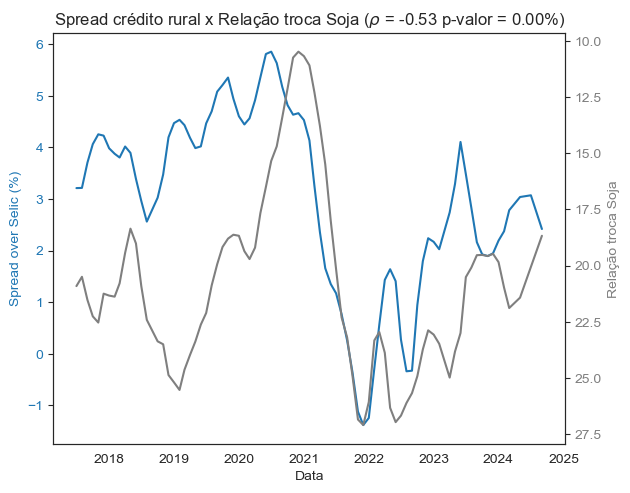

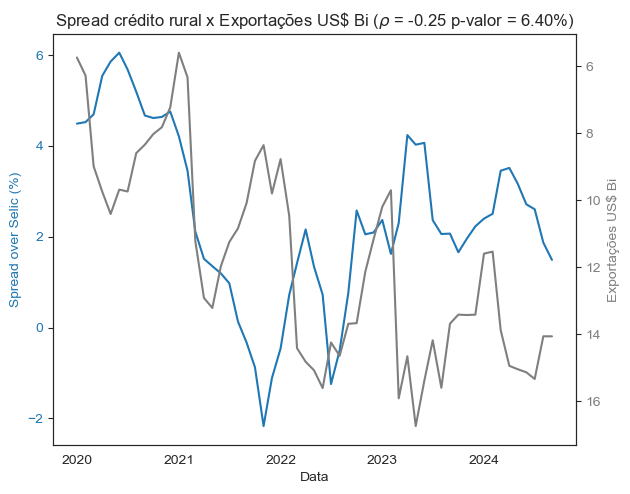

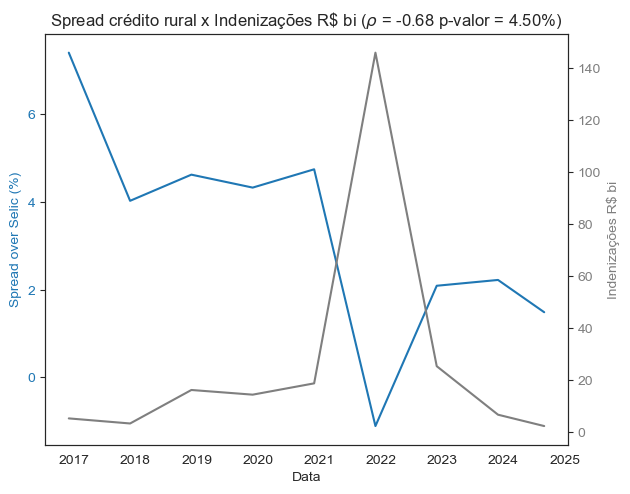

In [140]:
for k in series.keys():
    data = series[k]['Data']
    serie = series[k]['Serie']
    nome_serie = series[k]['Nome Serie']
    media_movel = series[k]['media_movel']
    inverte = series[k]['inverte']
    df_serie = pd.read_excel('Dados.xlsx', sheet_name=k)
    df_cruzado = pd.merge(left=df_spread, right=df_serie, on=data, how='inner')
    
    plotar_correlacao(df_cruzado, data=data, serie=serie, nome_serie=nome_serie, media_movel=media_movel,
                     inverte=inverte)